# Telco Customer Churn Analysis

## Introduction
This dataset comes from Telco. The problem is interesting, since among the total number of entries given, there seems to be ~26% of the customers who left the service. There are 20 features (some of them are derived, for example, the 'TotalCharges' simply is the multiplication of 'tenure' and 'MonthlyCharges'). The objective is to correctly predict who leaves the survice and what causes customers to continue or opt out of the service. 

#### I'll start by importing the necessary libraries and creating the dataframe from a .csv file.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
# import warnings
# warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv('telco.csv')

In [94]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let's set the 'customer ID' to be the index of the dataframe. 

In [10]:
df = df.set_index('customerID')

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Analysis

In [5]:
df.shape

(7043, 20)

In [208]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [209]:
for column_name in df.columns:
    print(df[column_name].value_counts())
    print('-'*40)

Male      3555
Female    3488
Name: gender, dtype: int64
----------------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
----------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
----------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
----------------------------------------
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
64     80
56     80
16     80
     ... 
20     71
62     70
41     70
53     70
32     69
54     68
47     68
50     68
51     68
58     67
49     66
43     65
42     65
31     65
34     65
37     65
57     65
55     64
40     64
48     64
33     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: te

In [210]:
print("Churn Percentage: {:1f} %".format(186900/(1869+5174)))

Churn Percentage: 26.536987 %


In [211]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [28]:
missing_data_list = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

for customer in missing_data_list:
    print('data: ', df['TotalCharges'].iloc[customer], 'is blank.')

data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.
data:    is blank.


In [27]:
df.iloc[missing_data_list]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


In [20]:
df[df['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


In [29]:
missing_data_list = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

for customer in missing_data_list:
    df['TotalCharges'].iloc[customer] = df['tenure'].iloc[customer]*df['MonthlyCharges'].iloc[customer]

/home/amol/.local/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
missing_data_list = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

for customer in missing_data_list:
    print('data: ', df['TotalCharges'].iloc[customer], 'is not blank.')

data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.
data:  0.0 is not blank.


In [31]:
for i in missing_data_list:
#     print(df['tenure'].iloc[i])
#     print(df['MonthlyCharges'].iloc[i])
#     print(df['TotalCharges'].iloc[i])
    print(df['Churn'].iloc[i])

No
No
No
No
No
No
No
No
No
No
No


In [32]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Visualizations

In [87]:
column_list = list(df.columns)

In [89]:
num_col = ['TotalCharges', 'MonthlyCharges', 'tenure']
for col in num_col: column_list.remove(col)

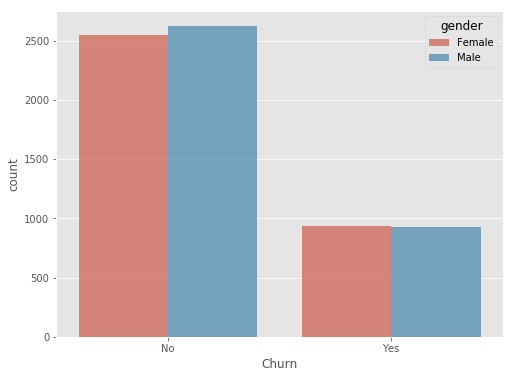

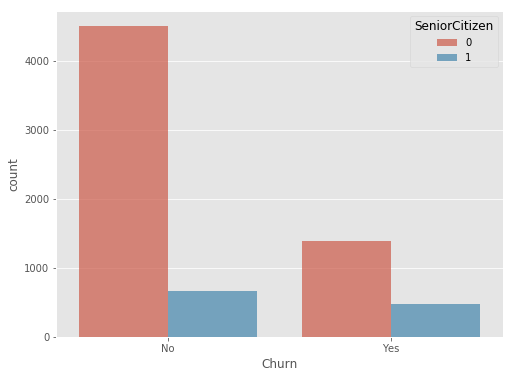

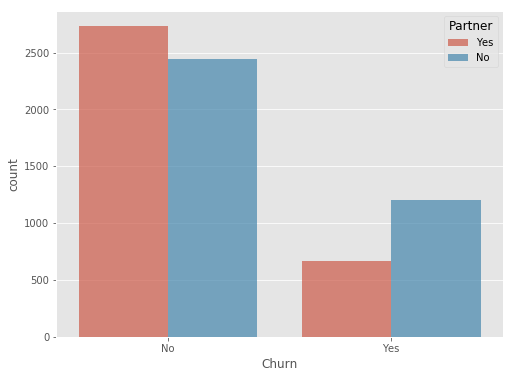

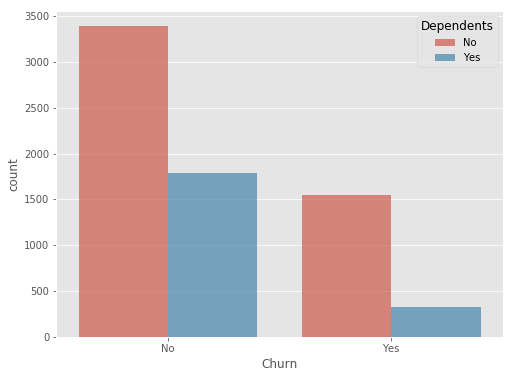

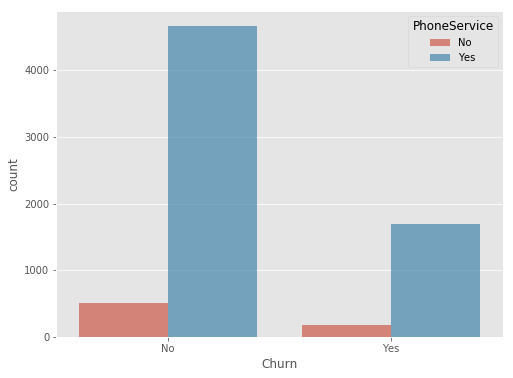

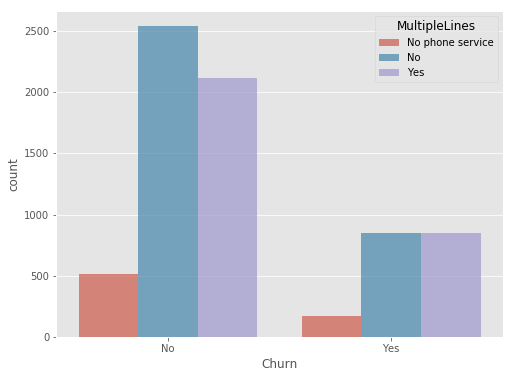

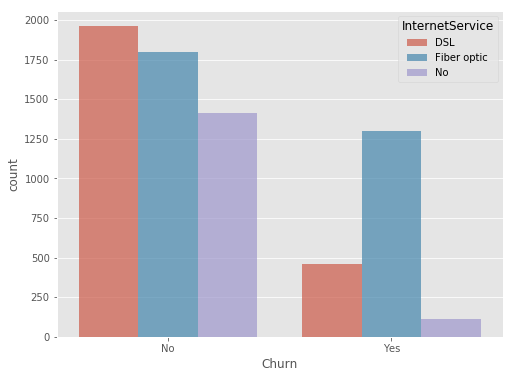

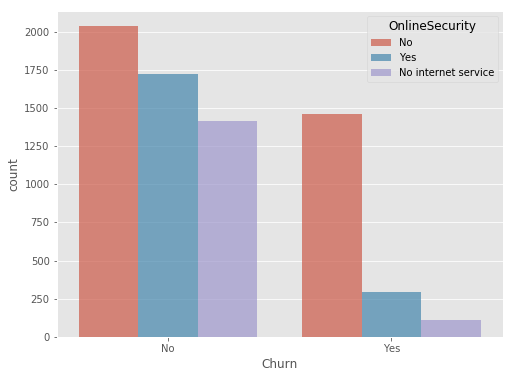

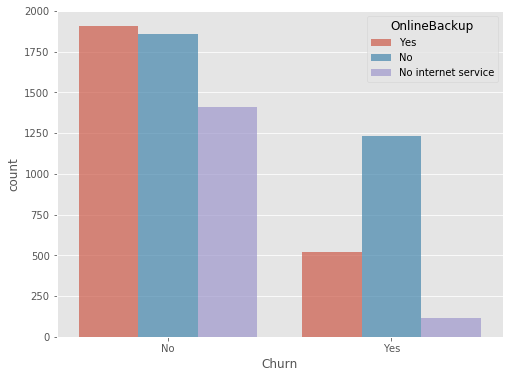

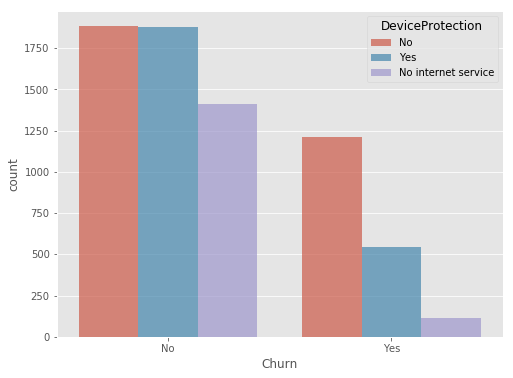

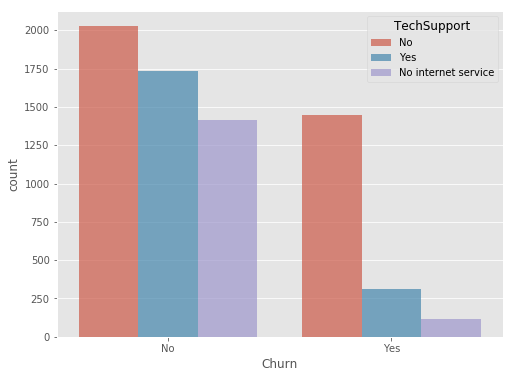

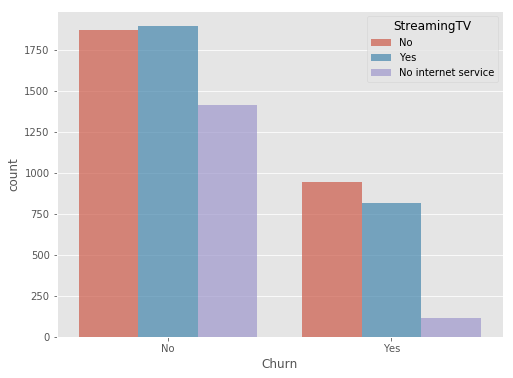

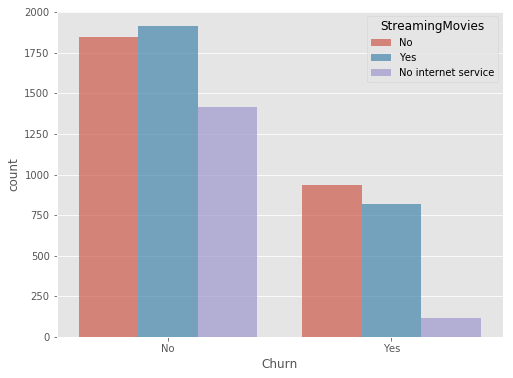

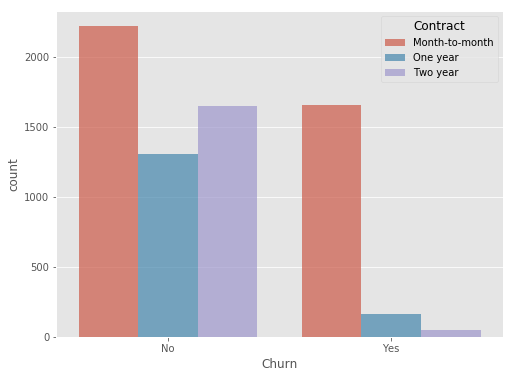

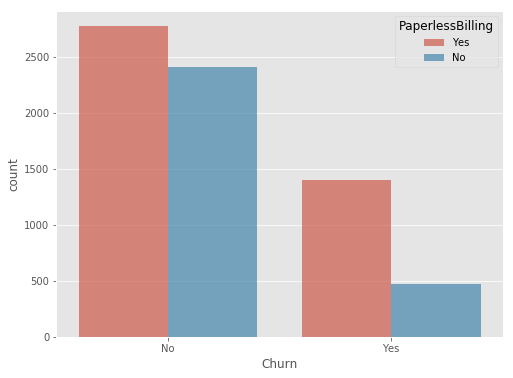

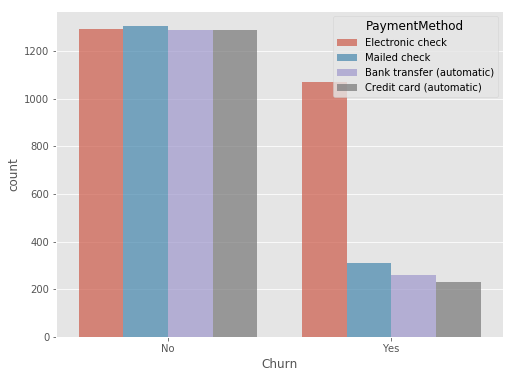

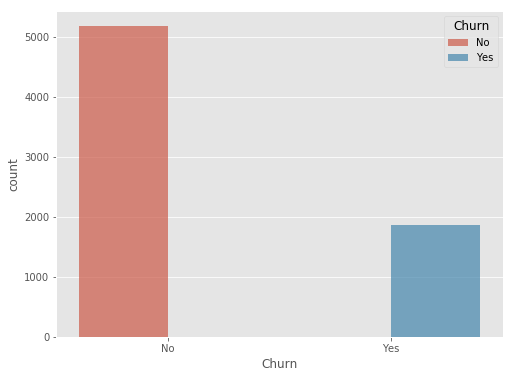

In [90]:
for col in column_list:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df['Churn'], alpha=0.7, hue=df[col])

Text(0.5, 0, 'Tunure')

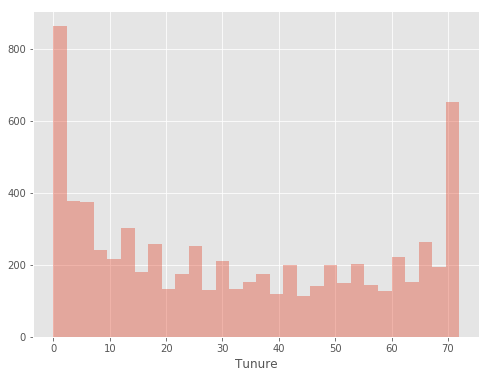

In [36]:
plt.figure(figsize=(8, 6))
sns.distplot(df['tenure'], bins=30, kde=False)
plt.xlabel('Tunure')

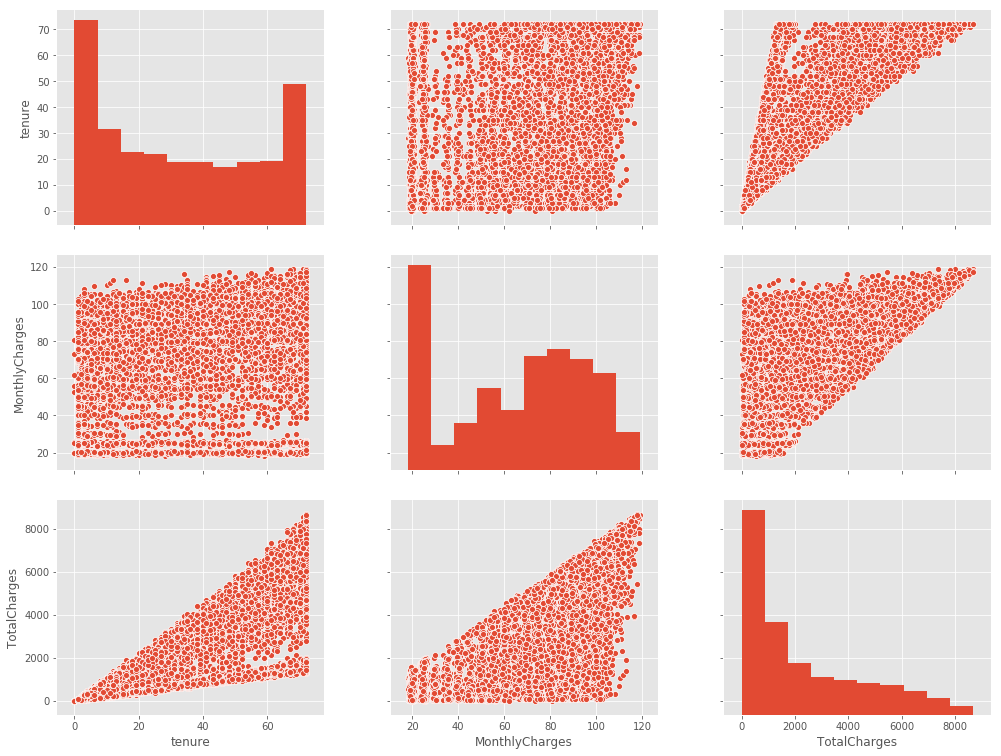

In [56]:
g = sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
g.fig.set_size_inches(15,11)

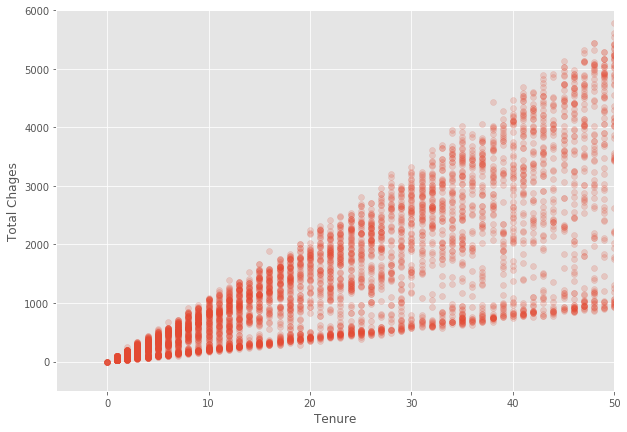

In [57]:
plt.figure(figsize=(10, 7))
plt.scatter(y=df['TotalCharges'], x=df['tenure'], alpha=.2,)
plt.xlabel('Tenure')
plt.ylabel('Total Chages')
plt.xlim(-5,50)
plt.ylim(-500,6000)
plt.show()

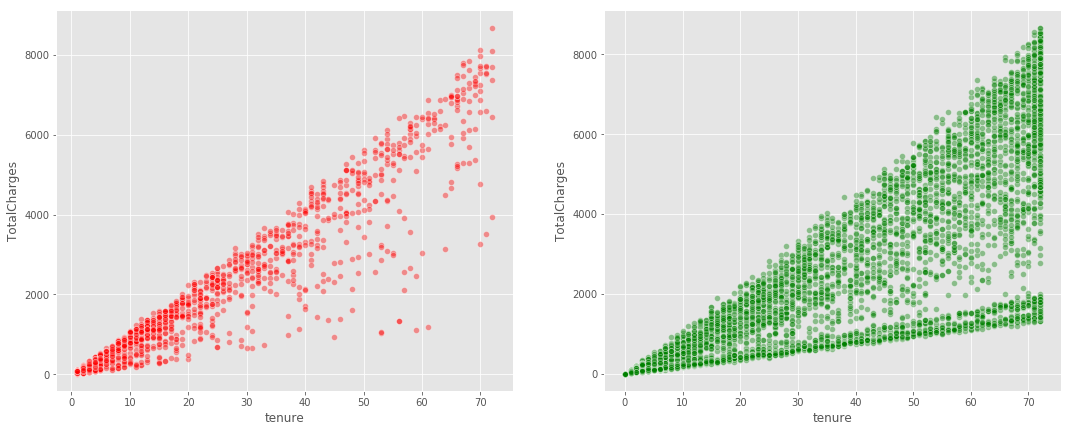

In [109]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(18, 7)
sns.scatterplot(x=df[df['Churn']=='Yes']['tenure'], 
                y=df[df['Churn']=='Yes']['TotalCharges'], 
                alpha=0.4, ax=axs[0], color='red')
sns.scatterplot(x=df[df['Churn']=='No']['tenure'], 
                y=df[df['Churn']=='No']['TotalCharges'], 
                alpha=0.4, ax=axs[1], color='green')

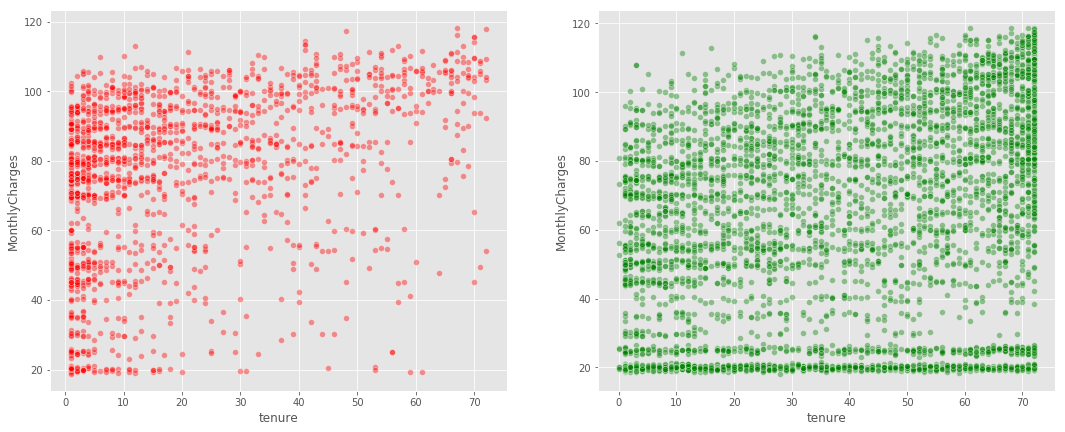

In [113]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(18, 7)
sns.scatterplot(x=df[df['Churn']=='Yes']['tenure'], y=df[df['Churn']=='Yes']['MonthlyCharges'], 
                alpha=0.4, ax=axs[0], color='red')
sns.scatterplot(x=df[df['Churn']=='No']['tenure'], y=df[df['Churn']=='No']['MonthlyCharges'], 
                alpha=0.4, ax=axs[1], color='green')

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1857: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


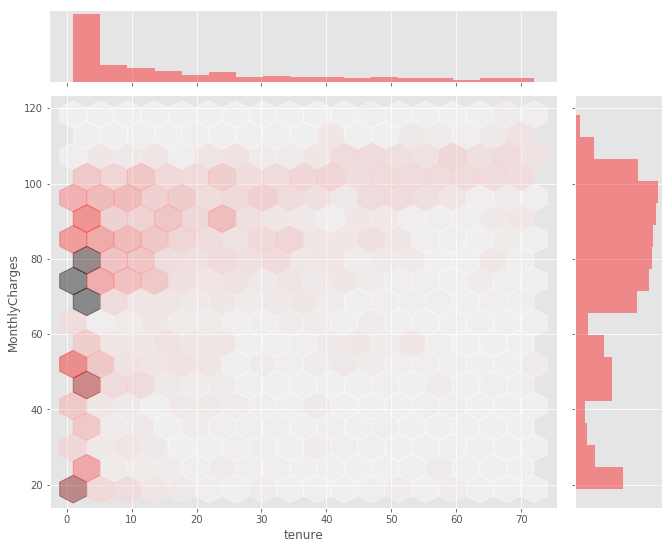

In [69]:
g = sns.jointplot(x=df[df['Churn']=='Yes']['tenure'], 
              y=df[df['Churn']=='Yes']['MonthlyCharges'], 
              alpha=0.4, color='red', kind="hex")
g.fig.set_size_inches(10,8)

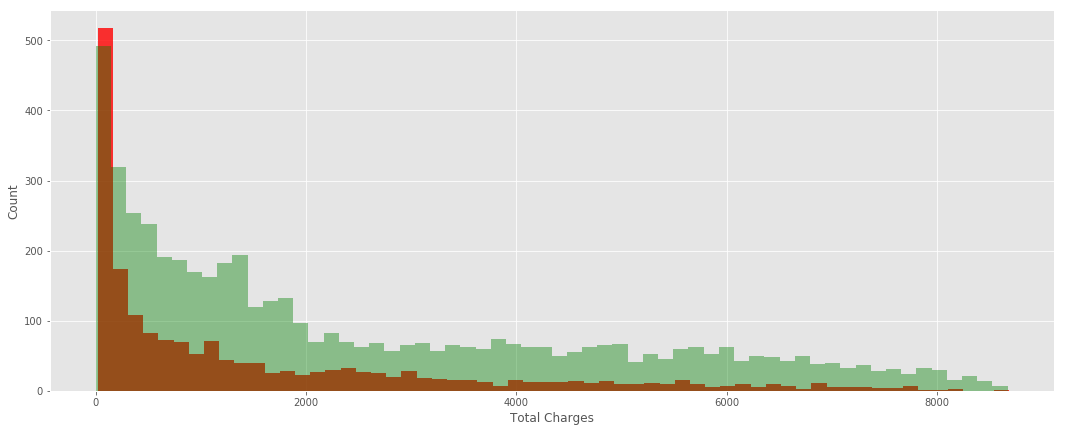

In [70]:
plt.figure(figsize=(18, 7))
plt.hist(df[df['Churn']=='Yes']['TotalCharges'], bins=60, alpha=0.8, color='red')
plt.hist(df[df['Churn']=='No']['TotalCharges'], bins=60, alpha=0.4, color='green')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()

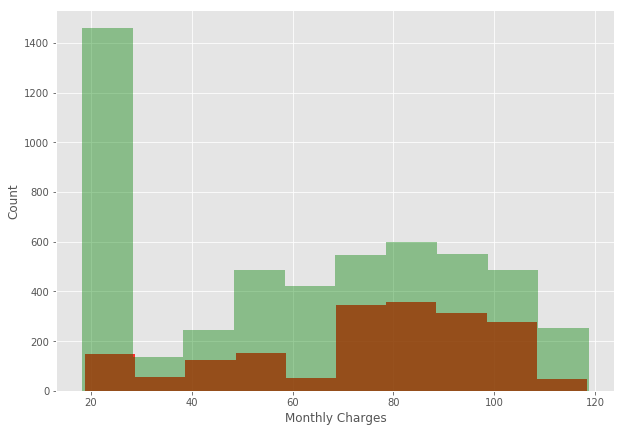

In [73]:
plt.figure(figsize=(10, 7))
plt.hist(df[df['Churn']=='Yes']['MonthlyCharges'], bins=10, alpha=0.8, color='red')
plt.hist(df[df['Churn']=='No']['MonthlyCharges'], bins=10, alpha=0.4, color='green')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1857: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


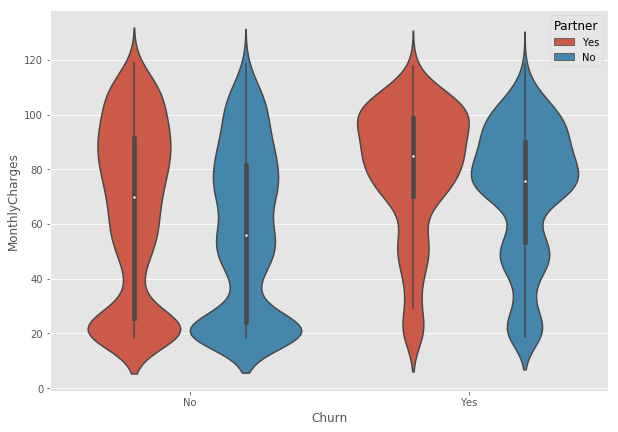

In [179]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, hue='Partner')